#Machine Learning#
##Regression##
HOrizontal is the independent variable
y= mx + c

Our notation convention:
y = output
x = input
w = parameters used in training

When training the model we are trying to reduce the error between the prediction and the actual. This is often calculated with the mean squared error

m = number of samples

y^i = prediction for the i-th sample and yi is the correct answer for that sample
Sum up all the errors

.fit() in sci-kit learn

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)








In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import matplotlib
matplotlib.style.use('ggplot')

In [8]:
X = np.array([5,7,9,11,13,15])
y = np.array([11,14,20,24,29,31])

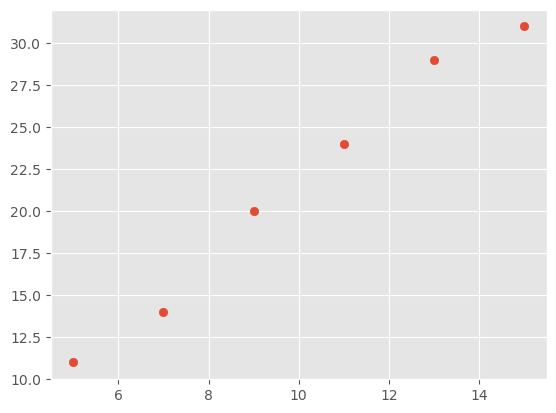

In [9]:
plt.scatter(X,y)
plt.show()

Check correlation coefficient

In [10]:
np.corrcoef(X,y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

Need to reshape X so it is a 2d array

In [11]:
X = X.reshape(-1,1)

In [12]:
X.shape

(6, 1)

In [13]:
X.ndim

2

Build the model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X,y)

LinearRegression()

Query the model


In [19]:
model.coef_

array([2.12857143])

In [20]:
model.intercept_

0.2142857142857153

In [21]:
pred = model.predict(X)

In [22]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

Evaluate

In [26]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [27]:
mse(y,pred)

0.723809523809522

In [28]:
r2(y,pred)

0.9864918906909576

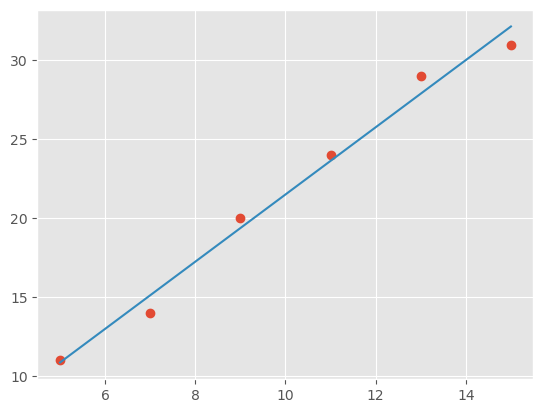

In [30]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

## Generalisation
Should have a training and a test set to evaluate our models.

**underfitting** = model cannot capture the underlying trend of the data. Often a result of an excessively simple model.

**overfitting** = model captures the noise of the data. Often a result of an excessively complicated model.

### Process
1. Collect data - split in train and test
2. Pick a base model to use
3. Train the data on the model - tweaking the model
4. Test the model.

### Build a model
1. Import Linear Regression from SK Learn
2. Create a model called `lr`
3. Train (fit) `lr` on training data
4. Evaluate the model on the test set


In [1]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)

NameError: name 'X' is not defined

`train_test_split` is a method built into sklearn to split a dataset into training and test sets randomly.

In [2]:
from sklearn.model_selection import train_test_split


 will make a test size of 25% of the data (which is the default anyway). the return values will be numpy arrays.

In [ ]:
X_train, X_ test, y_ train, y_test = train_test_split(X, y, train_size=0.75)

To see overfitting or underfitting compare the score for the training ser to the score for thee test set

In [ ]:
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)


If the training score is very poor then the model is underfit. If thee training score is much better than the test score then the model is overfit.

### Hyper parameters
 Hyper-parameters are parameters that are chosen rather than learned.

 Examples of Hyper-parameters are:
▪ the degree of your model, e.g. linear, quadratic, n-degree polynomial. Which features to 
use in your model? (Is every bit of information needed?) 
▪ the learning rate α
▪ the amount of Regularisation
▪ the number of layers/neurons in a Neural Network

### Often used procedure
Keeping the Test Data separate:
▪ Iterate through all possible hyper-parameters (e.g. polynomial M=1, then M=2, then M=3)
1. Fix the hyperparameter (M=1 to start) 
2. Randomly split the training data in k-folds
▪ Train a model using k − 1 folds of the dataset.
▪ Evaluate the model using the remaining fold.
▪ Record the error.
▪ Repeat until all folds have been a validation set.
3. Take the average error of all folds and store that result for the particular hyperparameter
4. Repeat from step 1, with the next hyperparameter
▪ Choose model (e.g. order of polynomial) with minimum (average) error on the folds
▪ (not always done but often) Retrain the model on the complete training data (training set 
+ validation set).
▪ You choose your model using validation, you can evaluate your final model with the 
test set


## Linear regression

In [1]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes() #Import dataset and divide into X and y 
print(diabetes.DESCR)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [2]:
from sklearn.model_selection import train_test_split
#Try some feature combinations
selected_features = ['sex', 'bmi', 'bp', 's3', 's5']
X_subset = X[selected_features].values

#Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=10)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 

degrees = range(1, 6)  #Testing different polynomial degrees 
train_mean_scores = []  #Stores cross-validation R2 scores for each degree
test_scores = []        #Stores test set R2 scores for each degree
error_train = []        #Stores MSE for the training set for each degree
error_test = []        #Stores MSE for the test set for each degree

#Evaluate each degree by creating a polynomial regression model run cross-validation
for d in degrees:
    #Calculate the poly features
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    X_test_poly = PolynomialFeatures(d).fit_transform(X_test)
    model = LinearRegression()
    
    #Perform cross-validation on the training set and get the R2 score as above
    train_scores = cross_val_score(model, X_train_poly, y_train)
    train_score = train_scores.mean()
    train_mean_scores.append(train_score)
    
    #Fit the model on the poly training set and score on the poly test set
    model.fit(X_train_poly, y_train)
    mse_train = mean_squared_error(model.predict(X_train_poly), y_train)
    error_train.append(mse_train)    #Record MSE for training set
    test_score = model.score(X_test_poly, y_test)
    mse_test = mean_squared_error(model.predict(X_test_poly), y_test)
    error_train.append(mse_test)    #Record MSE for test set
    test_scores.append(test_score)
    
    #Display the train and test scores for each degree
    print(f"Degree {d}: Train CV Mean R^2 Score = {train_score:.3f}, Test R^2 Score = {test_score:.3f}, TRain MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")


Degree 1: Train CV Mean R^2 Score = 0.479, Test R^2 Score = 0.521, TRain MSE = 2895.318, Test MSE = 2995.469
Degree 2: Train CV Mean R^2 Score = 0.487, Test R^2 Score = 0.472, TRain MSE = 2644.944, Test MSE = 3302.176
Degree 3: Train CV Mean R^2 Score = -1.089, Test R^2 Score = -0.634, TRain MSE = 13372.555, Test MSE = 10212.416
Degree 4: Train CV Mean R^2 Score = -5.110, Test R^2 Score = 0.061, TRain MSE = 4514.357, Test MSE = 5867.247
Degree 5: Train CV Mean R^2 Score = -263.831, Test R^2 Score = -7.990, TRain MSE = 16771.263, Test MSE = 56199.652


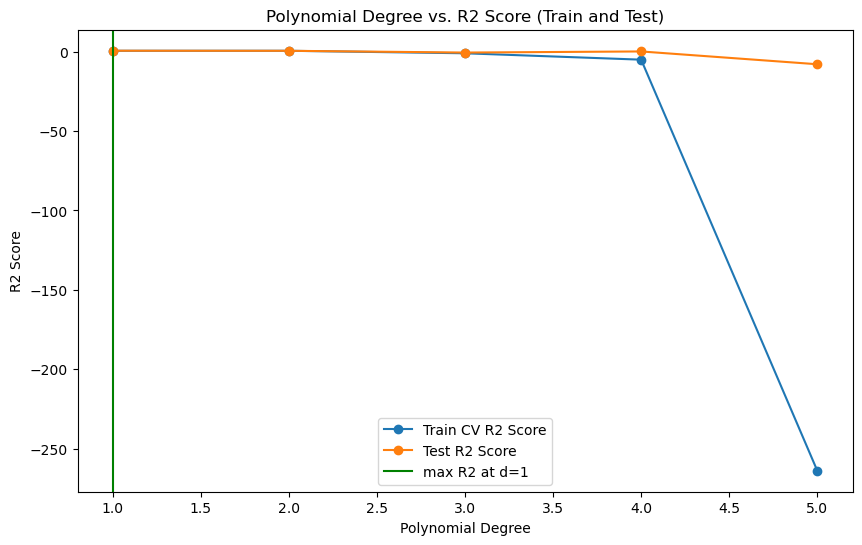

The optimal polynomial degree is 1 with a test R2 score of 0.521.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Plot results 
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mean_scores, marker='o', label='Train CV R2 Score')
plt.plot(degrees, test_scores, marker='o', label='Test R2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Polynomial Degree vs. R2 Score (Train and Test)')

#Find and display the best degree with the best R2 score on the test set
bestd = degrees[np.argmax(test_scores)]
plt.axvline(bestd, 0,1, color='g', label="max R2 at d=%d"%bestd)
plt.legend()
plt.show()
print(f"The optimal polynomial degree is {bestd} with a test R2 score of {max(test_scores):.3f}.")

The results above show that linear regression (degree 1) has superior performance than polynomial regression for the features I tested in the diabetes dataset. This means that the data likely follows a linear distribution.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X1_train = X_train[["age"]]
X1_test = X_test[["age"]]

In [7]:
model1 = LinearRegression()
scores = cross_val_score(model1, X1_train, y_train)
scores

array([ 2.41163784e-02,  9.93563234e-02,  2.97809168e-02,  4.96789943e-05,
       -1.12531282e-01])

In [8]:
scores.mean()

0.008154403137890464

## Logisitic regression
Is a classification model in Machine Learning. Something is either in category 0 or 1. The predicted value is a probability between 0 and 1. We can set the threshold to help in categorising. eg above 0.5 is a dog, but for malignant tumour we might set a different limit.

In [9]:
from sklearn.linear_model import LogisticRegression

the outputs of the model are:

`model.coef_` the slope of the line

`model.intercept_` where the line crosses the y axis

`model.score (X_test, y_test)` gives the accuracy of the model

`y_pred = model.predict(x_test)` this is calculated above in score, but this allows you to see the predicted values for y

`model.classes_` gives a list of the class labels known to the model

`model.predict_proba(X_test)` gives probability estimates for all the classes


In [11]:
# Ipython command to prepare the notebook for matplotlib
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

# Matplot lib argument for improved plots
from matplotlib import rcParams
